In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from local_utils import *

from datetime import datetime

str2date = lambda x: datetime.strptime(x.decode('ascii'), '%m/%d/%y %H:%M:%S')

aspect_ratio = 16./9 # On HD projectors nowadays, this is the aspect ratio.
                     # so I make my figures using that ratio so they show up nicely in presentations.
BoiseState_blue = "#0033A0"
BoiseState_orange = "#D64309"

In [2]:
def calc_mean_tilt_and_alt(time, tilt, alt, min_time, max_time):
    profile_point = (time > min_time) & (time < max_time)
    num_points = len(tilt[profile_point])
    
    cur_mean_tilt = np.mean(tilt[profile_point])
    cur_mean_alt = np.mean(alt[profile_point])
    
    cur_sigma_tilt = np.std(tilt[profile_point])/np.sqrt(num_points)
    cur_sigma_alt = np.std(alt[profile_point])/np.sqrt(num_points)
    
    return cur_mean_tilt, cur_mean_alt, profile_point, cur_sigma_tilt, cur_sigma_alt

means_alt:  [16.225       8.4         4.36909091  2.1       ]
means_tilt:  [8.20679338 7.52535511 7.03645721 6.1754583 ]
sigmas_wind:  [8.27437682 7.56433403 7.05960973 6.21316648]
0.3675728153055861 0.24125754228467844
1.4808492263756012
39.16940758929438 3.983758029244878
2.640739017994823


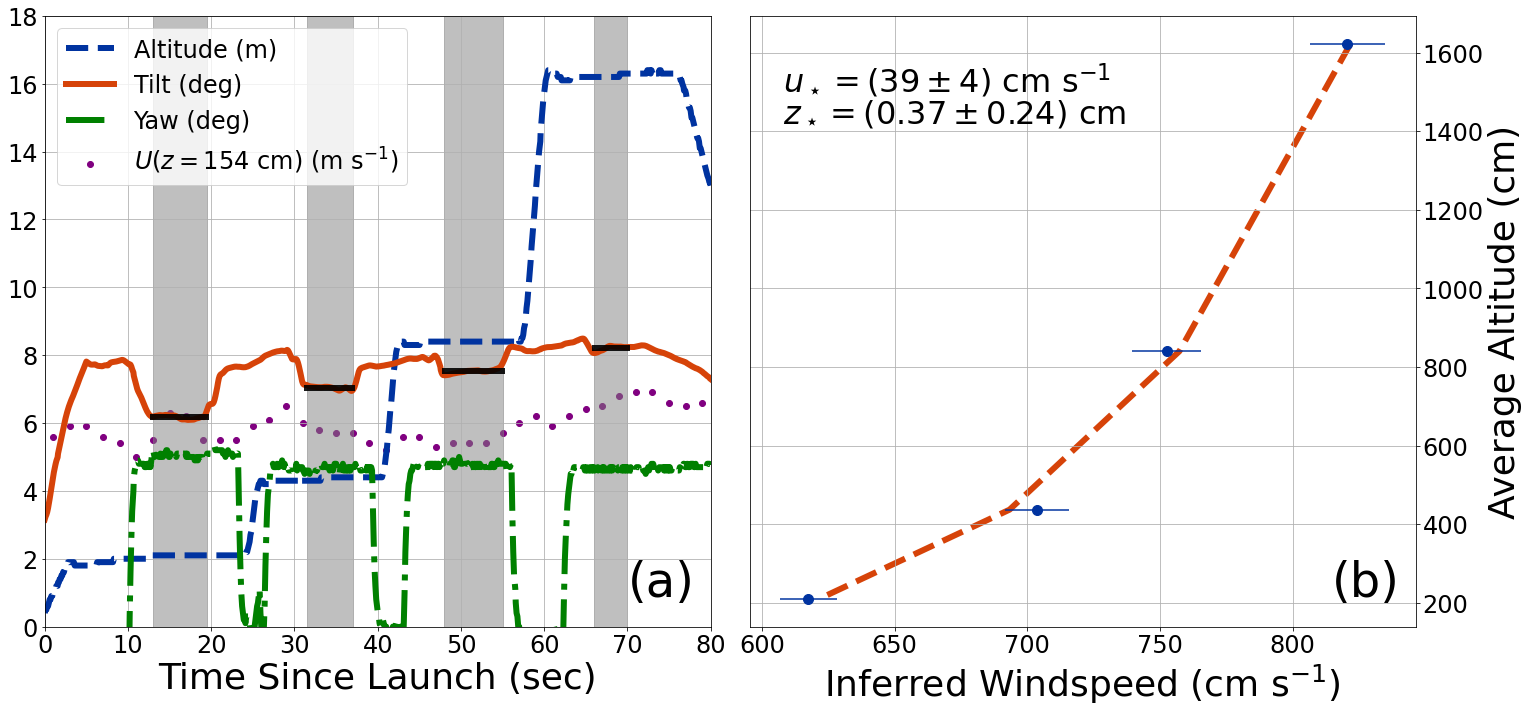

In [9]:
# This is the one figure you actually used in the paper.
fig = plt.figure(figsize=(12*aspect_ratio, 10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# 2, 4, 8, 16 m altitude with 10-s dwells with yaw signaling
# filename = "Field_Experiments/Drone_Experiments/2022-06-08_17-40-07_v2 - profile.csv"
filename = "Field_Experiments/Drone_Experiments/2022-06-08_17-49-18_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])
# estimate tilt uncertainty using point-to-point differences
tilt_sigma = np.median(np.abs(tilt[1:] - tilt[:-1]))

# Include windspeed
winddata = np.genfromtxt("Field_Experiments/Drone_Experiments/Seal Beach WEATHER - 2636851_2022-06-26 14_35_06.csv",
                         skip_header=10, delimiter=',')
# The data didn't record seconds for some reason.
delta_time = np.arange(0, 2.*(len(winddata[:, 7])), 2)
# Anem 51 starts recording at 16:47:00. Drone starts this flight at 17:40:07. The anemometer records times 
# every two seconds. So start_index represents 16:47:00 + (2 seconds)*start_index = 17:40:08.
start_index = 1594
time = 1. + np.arange(0, 2.*(len(winddata[start_index:, 7])), 2)

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
drone_time = data['timemillisecond']/1000
ax1.plot(drone_time, data['altitudem'], ls='--', lw=6, color=BoiseState_blue, label="Altitude (m)")

ax1.plot(drone_time, filtered_tilt, lw=6, color=BoiseState_orange, label="Tilt (deg)")
ax1.plot(drone_time, data['yawdeg'], lw=6, ls='-.', color='green', label="Yaw (deg)")

ax1.scatter(time, winddata[start_index:, 7], color='purple',
        label=r'$U(z = {\rm 154\ cm})\ \left({\rm m\ s^{-1}} \right)$')

ax1.text(0.875, 0.05, "(a)", fontsize=48, transform=ax1.transAxes)
ax1.tick_params(labelsize=24)
ax1.set_xlabel("Time Since Launch (sec)", fontsize=36)
ax1.legend(loc='upper left', fontsize=24)
ax1.grid(True)
ax1.set_xlim([0, 80])
ax1.set_ylim([0, 18])

#### Calculate average tilt during profiling times ####
# The max/min times are basically just eyeballed.
min_time = 13
max_time = 19.5
cur_mean_tilt, cur_mean_alt, profile_point, cur_sigma_tilt, cur_sigma_alt =\
    calc_mean_tilt_and_alt(drone_time, filtered_tilt, data['altitudem'], min_time, max_time)
means_tilt = np.array([cur_mean_tilt])
means_alt = np.array([cur_mean_alt])
sigmas_tilt = np.array([cur_sigma_tilt])
sigmas_alt = np.array([cur_sigma_alt])
ax1.plot(drone_time[profile_point], cur_mean_tilt*np.ones_like(drone_time[profile_point]),
       lw=6, color='k', alpha=0.9)
ax1.axvspan(min_time, max_time, color='grey', alpha=0.5)

min_time = 31.5
max_time = 37
cur_mean_tilt, cur_mean_alt, profile_point, cur_sigma_tilt, cur_sigma_alt =\
    calc_mean_tilt_and_alt(drone_time, filtered_tilt, data['altitudem'], min_time, max_time)
means_tilt = np.append(cur_mean_tilt, means_tilt)
means_alt = np.append(cur_mean_alt, means_alt)
sigmas_tilt = np.append(cur_sigma_tilt, sigmas_tilt)
sigmas_alt = np.append(cur_sigma_alt, sigmas_alt)
ax1.plot(drone_time[profile_point], cur_mean_tilt*np.ones_like(drone_time[profile_point]),
       lw=6, color='k', alpha=0.9)
ax1.axvspan(min_time, max_time, color='grey', alpha=0.5)

min_time = 48
max_time = 55
cur_mean_tilt, cur_mean_alt, profile_point, cur_sigma_tilt, cur_sigma_alt =\
    calc_mean_tilt_and_alt(drone_time, filtered_tilt, data['altitudem'], min_time, max_time)
means_tilt = np.append(cur_mean_tilt, means_tilt)
means_alt = np.append(cur_mean_alt, means_alt)
sigmas_tilt = np.append(cur_sigma_tilt, sigmas_tilt)
sigmas_alt = np.append(cur_sigma_alt, sigmas_alt)
ax1.plot(drone_time[profile_point], cur_mean_tilt*np.ones_like(drone_time[profile_point]),
       lw=6, color='k', alpha=0.9)
ax1.axvspan(min_time, max_time, color='grey', alpha=0.5)

min_time = 66
max_time = 70
cur_mean_tilt, cur_mean_alt, profile_point, cur_sigma_tilt, cur_sigma_alt =\
    calc_mean_tilt_and_alt(drone_time, filtered_tilt, data['altitudem'], min_time, max_time)

means_tilt = np.append(cur_mean_tilt, means_tilt)
means_alt = np.append(cur_mean_alt, means_alt)
sigmas_tilt = np.append(cur_sigma_tilt, sigmas_tilt)
sigmas_alt = np.append(cur_sigma_alt, sigmas_alt)
ax1.plot(drone_time[profile_point], cur_mean_tilt*np.ones_like(drone_time[profile_point]),
       lw=6, color='k', alpha=0.9)
ax1.axvspan(min_time, max_time, color='grey', alpha=0.5)

print("means_alt: ", means_alt)
print("means_tilt: ", means_tilt)

### Adding in the inferred wind profile ###
kappa = 0.4

# ax.errorbar(means_alt, means_tilt, marker='o', xerr=sigmas_alt, yerr=sigmas_tilt, color='k', ls='')

# Convert tilt to wind speed
# slope = 1.4 # pm 0.1 m/s/deg
# sigma_slope = 0.1
# intercept = -2.3 # pm 0.8 m/s
# sigma_intercept = 0.8

# 2022 Aug 2 - Re-worked the tilt-wind speed fit to force a zero intercept
slope = 1.0
sigma_slope = 0.01

# means_wind = np.polyval([slope, intercept], means_tilt)
means_wind = slope*means_tilt
# Add in all uncertainties
# sigmas_wind = np.sqrt((means_tilt*sigma_slope)**2 + (sigma_intercept)**2 + (slope*sigmas_tilt)**2)
# sigmas_wind = np.sqrt((slope*sigmas_tilt)**2)
sigmas_wind = np.sqrt((means_tilt*sigma_slope)**2 + (slope*sigmas_tilt)**2)
print("sigmas_wind: ", sigmas_wind*100)

# convert everything to cm
x = means_alt*100
y = means_wind*100
y_sigma = sigmas_wind*100

# Toss outlier
# outlier = 1
# x = np.delete(x, outlier)
# y = np.delete(y, outlier)
# y_sigma = np.delete(y_sigma, outlier)

log_z = np.log(x/np.min(x))
popt, pcov = curve_fit(lin_fit, log_z, y, sigma=y_sigma)
unc = np.sqrt(np.diag(pcov))

# Rescale using reduced chi-squared
chisq = redchisqg(y, lin_fit(log_z, *popt), deg=2, sd=y_sigma)
unc *= np.sqrt(chisq)
y_sigma *= np.sqrt(chisq)
ustar = calc_ustar_from_slope(kappa, popt[0])
sigma_ustar = calc_sigma_ustar(kappa, unc[0])
zstar = calc_zstar_from_slope_and_intercept(np.min(x), popt[0], popt[1])
sigma_zstar = calc_sigma_zstar(np.min(means_alt)*100, popt[0], popt[1], unc[0], unc[1])

ax2.errorbar(y, x, marker='o', markersize=10, xerr=y_sigma, color=BoiseState_blue, ls='')
ax2.plot(lin_fit(log_z, *popt), x, color=BoiseState_orange, lw=6, ls='--', zorder=-1)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.tick_params(labelsize=24)
ax2.set_ylabel("Average Altitude (cm)", fontsize=36)
ax2.set_xlabel(r'Inferred Windspeed $\left( { \rm cm\ s^{-1} } \right)$', fontsize=36)
ax2.grid(True)

ax2.text(0.875, 0.05, "(b)", fontsize=48, transform=ax2.transAxes)
ax2.text(0.05, 0.875, r'$u_\star = \left( %.0f\pm%.0f \right)\ {\rm cm\ s^{-1}}$' % (ustar, sigma_ustar), 
         fontsize=32, transform=ax2.transAxes)
ax2.text(0.05, 0.825, r'$z_\star = \left( %.2f\pm%.2f \right)\ {\rm cm}$' % (zstar, sigma_zstar), 
         fontsize=32, transform=ax2.transAxes)

print(zstar, sigma_zstar)
best_fit_zstar = 0.01
best_fit_zstar_sigma = 0.01
print(np.abs(zstar - best_fit_zstar)/np.sqrt(sigma_zstar**2 + best_fit_zstar_sigma**2))
print(ustar, sigma_ustar)
best_fit_ustar = 26.
best_fit_ustar_sigma = 3.
print(np.abs(ustar - best_fit_ustar)/np.sqrt(sigma_ustar**2 + best_fit_ustar_sigma**2))

# print(x)
# print(y)
# print(x*np.exp(-kappa*y/ustar))

plt.tight_layout()
fig.savefig("wind_profile_experiment_2022-06-08_17-49-18_v2.jpg", dpi=300, bbox_inches="tight")

4.635900786344608e-05 6.515373893435844e-05
0.9953429732349863
18.017667209119903 1.841022140721242
2.2678031254633004
[1632.          832.85714286  440.          203.07692308]
[782.95105312 710.21661196 739.46002003 688.0866253 ]
[4.61187823e-05 1.18303921e-04 3.26535382e-05 4.71472129e-05]


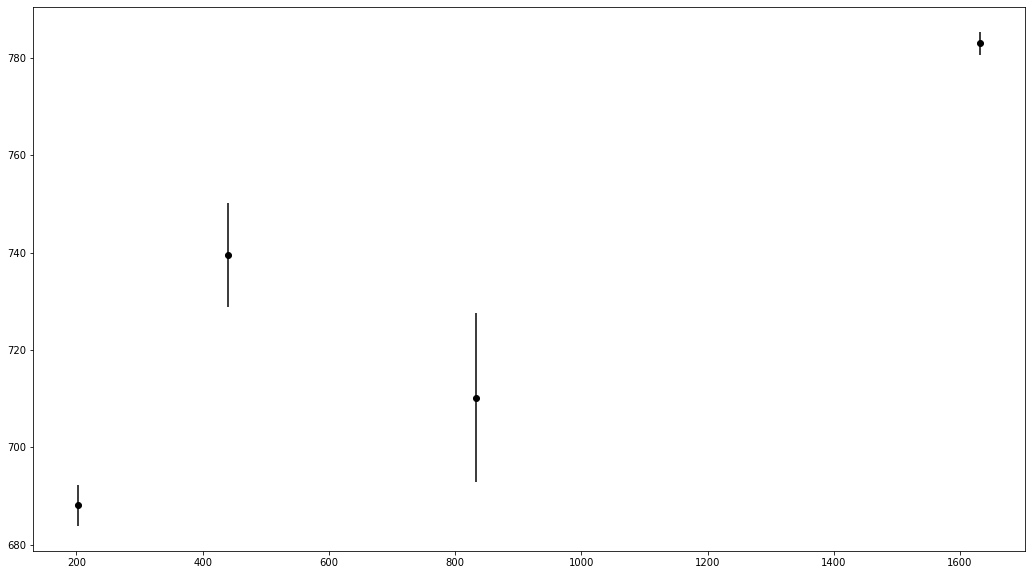

In [9]:
kappa = 0.4

fig = plt.figure(figsize=(10*aspect_ratio, 10))
ax = fig.add_subplot(111)

# ax.errorbar(means_alt, means_tilt, marker='o', xerr=sigmas_alt, yerr=sigmas_tilt, color='k', ls='')

# Convert tilt to wind speed
slope = 1.4 # pm 0.1 m/s/deg
intercept = -2.3 # pm 0.8 m/s
means_wind = np.polyval([slope, intercept], means_tilt)
sigmas_wind = slope*sigmas_tilt

# convert everything to cm
x = means_alt*100
y = means_wind*100
y_sigma = sigmas_wind*100

# Toss outlier
# x = np.delete(x, 2)
# y = np.delete(y, 2)
# y_sigma = np.delete(y_sigma, 2)

ax.errorbar(x, y, marker='o', yerr=y_sigma, color='k', ls='')

log_z = np.log(x/np.min(x))
popt, pcov = curve_fit(lin_fit, log_z, y, sigma=y_sigma)
unc = np.sqrt(np.diag(pcov))
ustar = calc_ustar_from_slope(kappa, popt[0])
sigma_ustar = calc_sigma_ustar(kappa, unc[0])
zstar = calc_zstar_from_slope_and_intercept(np.min(x), popt[0], popt[1])
sigma_zstar = calc_sigma_zstar(popt[0], zstar, unc[0], popt[1], unc[1], np.abs(pcov[0,1]))

print(zstar, sigma_zstar)
best_fit_zstar = 0.01
best_fit_zstar_sigma = 0.01
print(np.abs(zstar - best_fit_zstar)/np.sqrt(sigma_zstar**2 + best_fit_zstar_sigma**2))
print(ustar, sigma_ustar)
best_fit_ustar = 26.
best_fit_ustar_sigma = 3.
print(np.abs(ustar - best_fit_ustar)/np.sqrt(sigma_ustar**2 + best_fit_ustar_sigma**2))

print(x)
print(y)
print(x*np.exp(-kappa*y/ustar))

In [54]:
# This is the one figure you actually used in the paper.

# fig = plt.figure(figsize=(10*aspect_ratio, 10))
# ax = fig.add_subplot(111)

# 2, 4, 8, 16 m altitude with 10-s dwells with yaw signaling
filename ="Field_Experiments/Drone_Experiments/2022-06-08_17-49-18_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])
# estimate tilt uncertainty using point-to-point differences
tilt_sigma = np.median(np.abs(tilt[1:] - tilt[:-1]))

# Include windspeed

winddata = np.genfromtxt("Field_Experiments/Drone_Experiments/test.csv",
                         skip_header=11, delimiter=',', converters = {0: str2date})
print(winddata)
# # The data didn't record seconds for some reason.
# delta_time = np.arange(0, 2.*(len(winddata[:, 7])), 2)
# # Anem 51 starts recording at 16:47:00. Drone starts this flight at 17:40:07. The anemometer records times 
# # every two seconds. So start_index represents 16:47:00 + (2 seconds)*start_index = 17:40:08.
# start_index = 1594
# time = 1. + np.arange(0, 2.*(len(winddata[start_index:, 7])), 2)

# N = 100 # measurements every 0.1 of a second
# filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
# drone_time = data['timemillisecond']/1000
# ax.plot(drone_time, data['altitudem'], ls='--', lw=6, color=BoiseState_blue, label="Altitude (m)")
# ax.plot(drone_time, filtered_tilt, lw=6, color=BoiseState_orange, label="Tilt (deg)")
# ax.plot(drone_time, data['yawdeg'], lw=6, ls='-.', color='green', label="Yaw (deg)")

# ax.scatter(time, winddata[start_index:, 7], color='purple',
#         label=r'$U(z = {\rm 154\ cm})\ \left({\rm m\ s^{-1}} \right)$')

# ax.tick_params(labelsize=24)
# ax.set_xlabel("Time Since Launch (sec)", fontsize=36)
# ax.legend(loc='upper left', fontsize=24)
# ax.grid(True)
# ax.set_xlim([0, 80])
# ax.set_ylim([0, 18])

# #### Calculate average tilt during profiling times ####
# min_time = 13
# max_time = 19.5
# cur_mean_tilt, cur_mean_alt, profile_point, cur_sigma_tilt, cur_sigma_alt =\
#     calc_mean_tilt_and_alt(drone_time, filtered_tilt, data['altitudem'], min_time, max_time)
# means_tilt = np.array([cur_mean_tilt])
# means_alt = np.array([cur_mean_alt])
# sigmas_tilt = np.array([cur_sigma_tilt])
# sigmas_alt = np.array([cur_sigma_alt])
# ax.plot(drone_time[profile_point], cur_mean_tilt*np.ones_like(drone_time[profile_point]),
#        lw=6, ls='--', color='k')

# min_time = 31.5
# max_time = 37
# cur_mean_tilt, cur_mean_alt, profile_point, cur_sigma_tilt, cur_sigma_alt =\
#     calc_mean_tilt_and_alt(drone_time, filtered_tilt, data['altitudem'], min_time, max_time)
# means_tilt = np.append(cur_mean_tilt, means_tilt)
# means_alt = np.append(cur_mean_alt, means_alt)
# sigmas_tilt = np.append(cur_sigma_tilt, sigmas_tilt)
# sigmas_alt = np.append(cur_sigma_alt, sigmas_alt)
# ax.plot(drone_time[profile_point], cur_mean_tilt*np.ones_like(drone_time[profile_point]),
#        lw=6, ls='--', color='k')

# min_time = 48
# max_time = 55
# cur_mean_tilt, cur_mean_alt, profile_point, cur_sigma_tilt, cur_sigma_alt =\
#     calc_mean_tilt_and_alt(drone_time, filtered_tilt, data['altitudem'], min_time, max_time)
# means_tilt = np.append(cur_mean_tilt, means_tilt)
# means_alt = np.append(cur_mean_alt, means_alt)
# sigmas_tilt = np.append(cur_sigma_tilt, sigmas_tilt)
# sigmas_alt = np.append(cur_sigma_alt, sigmas_alt)
# ax.plot(drone_time[profile_point], cur_mean_tilt*np.ones_like(drone_time[profile_point]),
#        lw=6, ls='--', color='k')

# min_time = 66
# max_time = 70
# cur_mean_tilt, cur_mean_alt, profile_point, cur_sigma_tilt, cur_sigma_alt =\
#     calc_mean_tilt_and_alt(drone_time, filtered_tilt, data['altitudem'], min_time, max_time)
# means_tilt = np.append(cur_mean_tilt, means_tilt)
# means_alt = np.append(cur_mean_alt, means_alt)
# sigmas_tilt = np.append(cur_sigma_tilt, sigmas_tilt)
# sigmas_alt = np.append(cur_sigma_alt, sigmas_alt)
# ax.plot(drone_time[profile_point], cur_mean_tilt*np.ones_like(drone_time[profile_point]),
#        lw=6, ls='--', color='k')

# # fig.savefig("../../wind_profile_experiment_2022-06-07_16-53-23_v2.jpg", dpi=300, bbox_inches="tight")

[(datetime.datetime(2022, 5, 18, 7, 25, 36), 23. , 17.7, 62.6, 774.9, 2203., 774.9, 0., 23.1, 15.5, 3061., nan, nan, nan, nan, 23.)
 (datetime.datetime(2022, 5, 18, 7, 25, 38), 23.1, 18.1, 64.6, 774.4, 2210., 774.4, 0., 23.2, 16. , 3070., nan, nan, nan, nan, 23.)
 (datetime.datetime(2022, 5, 18, 7, 25, 40), 23.1, 18.4, 66.4, 774.2, 2212., 774.2, 0., 23.3, 16.4, 3074., nan, nan, nan, nan, 23.)
 ...
 (datetime.datetime(2022, 6, 8, 21, 13), 23. , 15. , 43.9, 913.9,  860., 913.9, 0., 22.2, 10.1, 1392., nan, nan, nan, nan, 23.)
 (datetime.datetime(2022, 6, 8, 21, 13, 2), 23. , 15. , 44. , 913.7,  861., 913.7, 0., 22.2, 10.1, 1393., nan, nan, nan, nan, 23.)
 (datetime.datetime(2022, 6, 8, 21, 13, 4), 23. , 15. , 43.9, 914.2,  857., 914.2, 0., 22.2, 10.1, 1389., nan, nan, nan, nan, 23.)]


---

All the rest of the figures below were experiments to inspect the data.

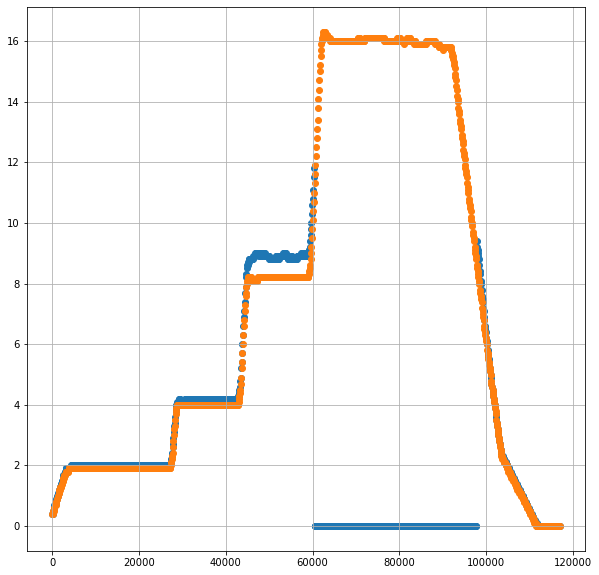

In [25]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data['timemillisecond'], data['ultrasonicHeightm'])
plt.scatter(data['timemillisecond'], data['altitudem'])
# plt.scatter(data['timemillisecond'], data['altitudeRaw'])
plt.grid(True)

# So the sonic can't see altitudes above 8 m

[ 1.10755248 -0.10458586]


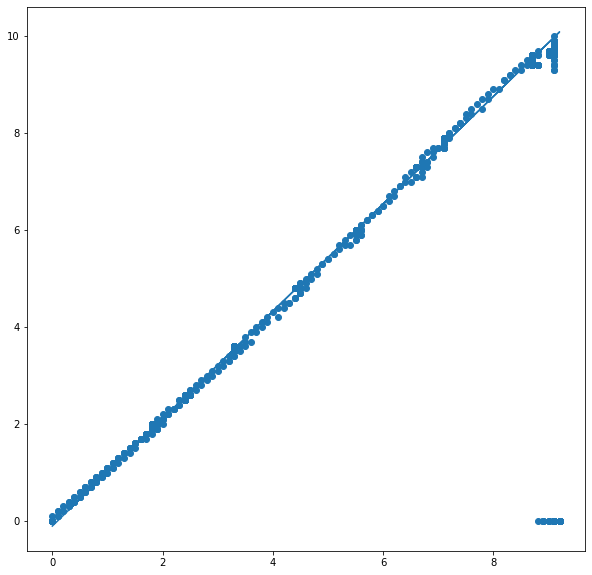

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data['altitudem'], data['ultrasonicHeightm'])

ind = data['altitudem'] < 8.
coeffs = np.polyfit(data['altitudem'][ind], data['ultrasonicHeightm'][ind], 1)
print(coeffs)

plt.plot(data['altitudem'], np.polyval(coeffs, data['altitudem']))

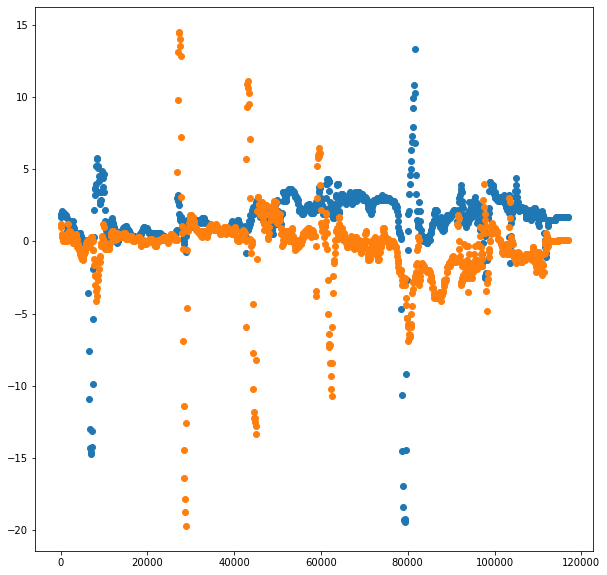

In [27]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(data['timemillisecond'], data['pitchdeg'])
plt.scatter(data['timemillisecond'], data['rolldeg'])


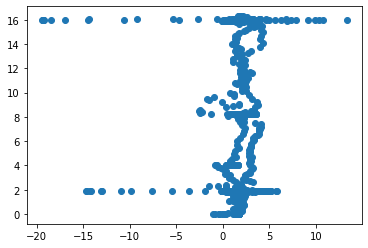

In [29]:
plt.scatter(data['pitchdeg'], data['altitudem'])

0.10000000000000009


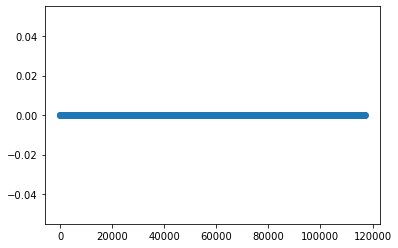

In [46]:
# plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], data['pitchdeg'])

print(np.median(np.abs(data['pitchdeg'][1:] - data['pitchdeg'][:-1])))

In [42]:
# https://math.stackexchange.com/questions/2563622/vertical-inclination-from-pitch-and-roll

def calc_tilt(pitch, roll):
    return np.degrees(np.arctan(np.sqrt(np.tan(np.radians(roll))**2+np.tan(np.radians(pitch))**2)))

print(calc_tilt(45., 90.))

90.0


[0.34186766 2.31199524]


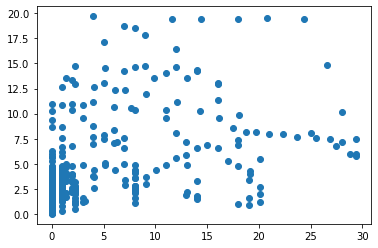

In [51]:
x = np.sqrt(data['velocityXRaw']**2 + data['velocityYRaw']**2)
y = calc_tilt(data['pitchdeg'], data['rolldeg'])

plt.scatter(x, y)

coeffs = np.polyfit(x, y, 1)
print(coeffs)

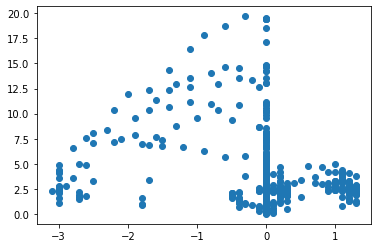

In [48]:
plt.scatter(data['velocityZmps'], calc_tilt(data['pitchdeg'], data['rolldeg']))

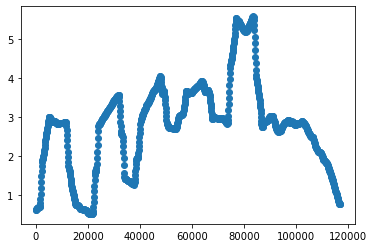

In [56]:
# Smooth tilt signal
N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(calc_tilt(data['pitchdeg'], data['rolldeg']), np.ones(N)/N, mode='same')

plt.scatter(data['timemillisecond'], filtered_tilt)

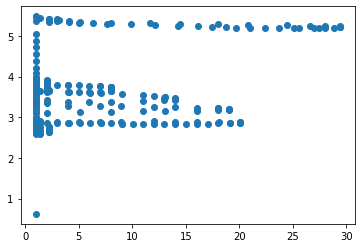

In [62]:
x = np.sqrt(data['velocityXRaw']**2 + data['velocityYRaw']**2)
N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(calc_tilt(data['pitchdeg'], data['rolldeg']), np.ones(N)/N, mode='same')

ind = x > 0
plt.scatter(x[ind], filtered_tilt[ind])

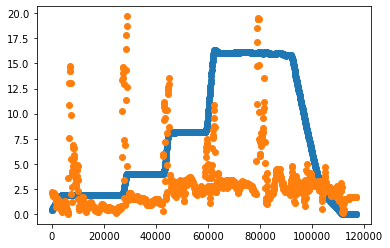

In [80]:
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], tilt)
# plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
# plt.ylim([0, 6])

(0.0, 20.0)

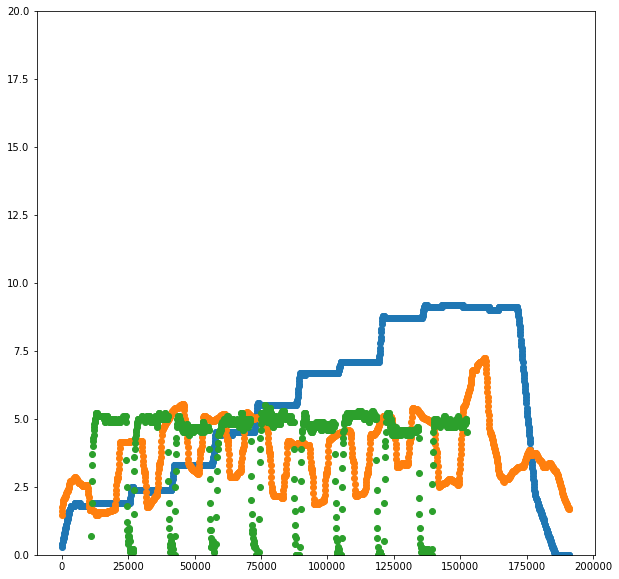

In [103]:
# 1, 2, 3, 4 ... m altitude
filename ="Field_Experiments/Drone_Experiments/2022-06-07_17-32-52_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

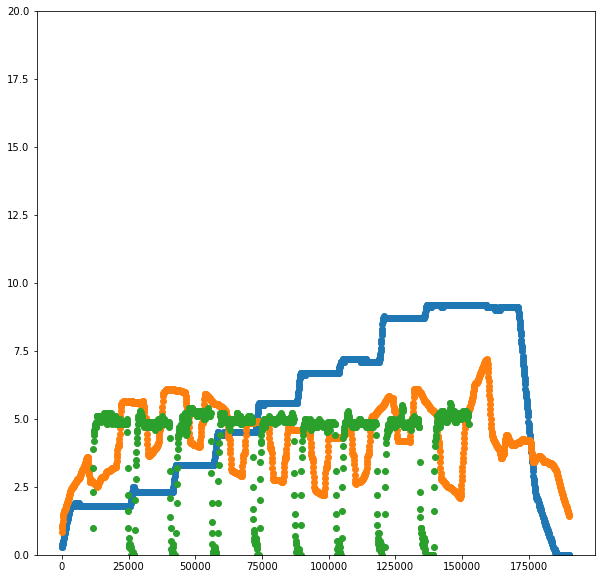

In [104]:
# 1, 2, 3, 4 ... m altitude
filename ="Field_Experiments/Drone_Experiments/2022-06-07_17-28-57_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 6.0)

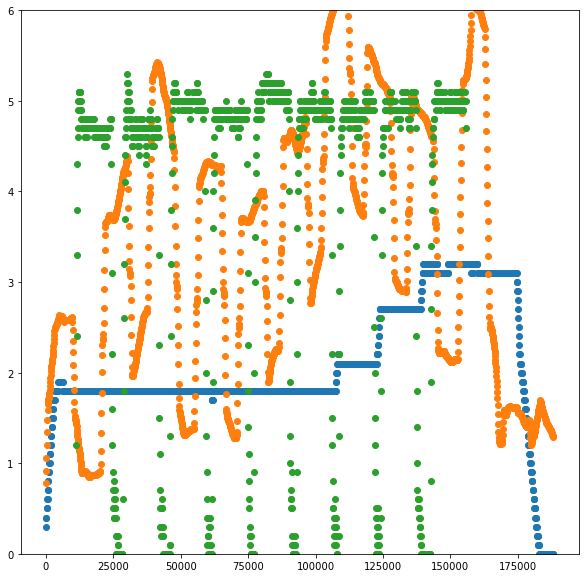

In [111]:
# 1, 2, 3, 4 ... m altitude
filename ="Field_Experiments/Drone_Experiments/2022-06-07_17-24-10_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 6])

(0.0, 20.0)

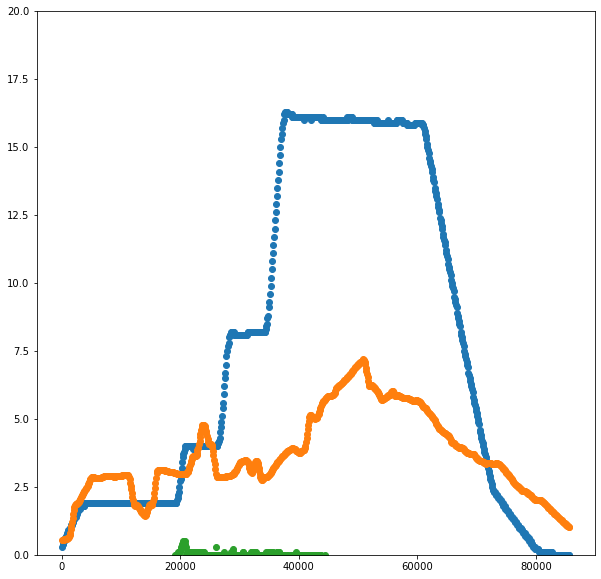

In [115]:
# 2, 4, 8, 16 m altitude but didn't set yaw signaling
filename ="Field_Experiments/Drone_Experiments/2022-06-07_17-09-10_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

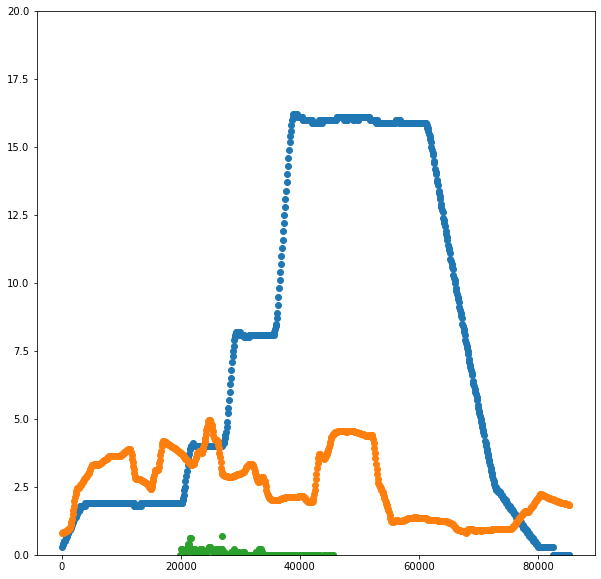

In [118]:
# 2, 4, 8, 16 m altitude with 5-s dwells but didn't set yaw signaling
filename ="Field_Experiments/Drone_Experiments/2022-06-07_17-06-56_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

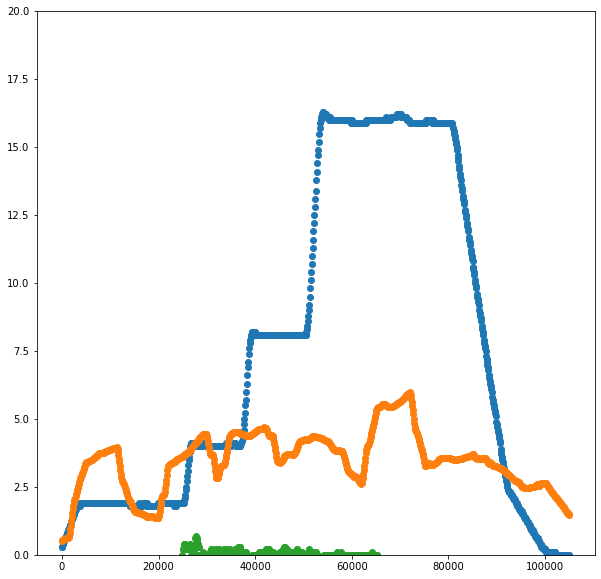

In [121]:
# 2, 4, 8, 16 m altitude with 5-s dwells but didn't set yaw signaling
filename ="Field_Experiments/Drone_Experiments/2022-06-07_17-02-20_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 18.0)

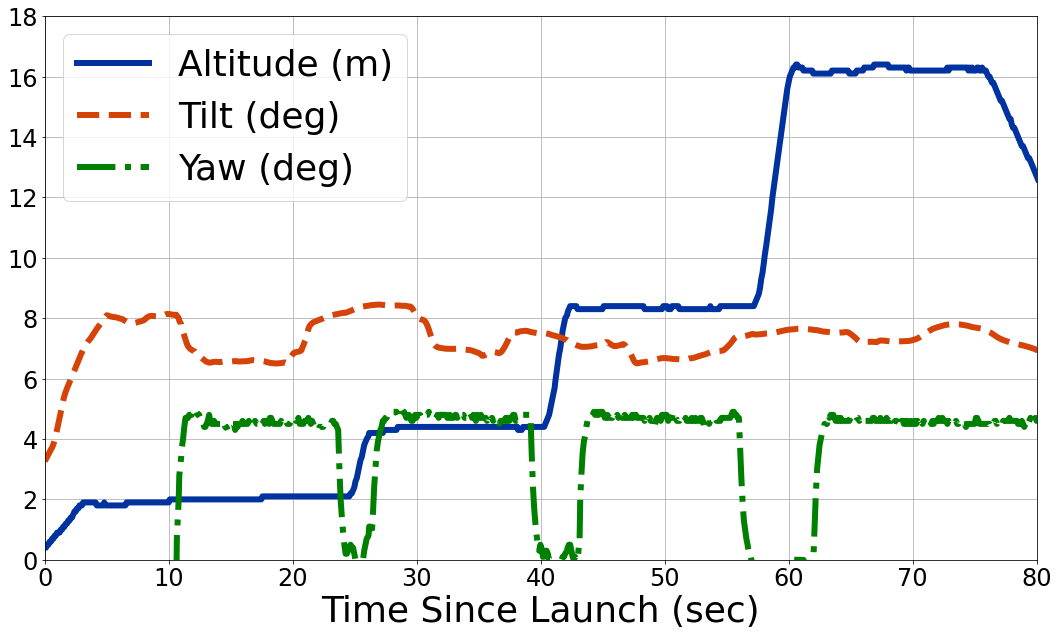

In [7]:
# 2, 4, 8, 16 m altitude with 10-s dwells with yaw signaling
filename ="Field_Experiments/Drone_Experiments/2022-06-08_17-40-07_v2 - profile.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10*aspect_ratio, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.plot(data['timemillisecond']/1000, data['altitudem'], lw=6, color=BoiseState_blue, label="Altitude (m)")
plt.plot(data['timemillisecond']/1000, filtered_tilt, lw=6, ls='--', color=BoiseState_orange, label="Tilt (deg)")
plt.plot(data['timemillisecond']/1000, data['yawdeg'], lw=6, ls='-.', color='green', label="Yaw (deg)")

plt.tick_params(labelsize=24)
plt.xlabel("Time Since Launch (sec)", fontsize=36)
plt.legend(loc='upper left', fontsize=36)
plt.grid(True)
plt.xlim([0, 80])
plt.ylim([0, 18])

# fig.savefig("../../wind_profile_experiment_2022-06-07_16-53-23_v2.jpg", dpi=300, bbox_inches="tight")

In [3]:
# 2, 4, 8, 16 m altitude with 30-s dwells with yaw signaling
filename ="Field_Experiments/Drone_Experiments/2022-06-08_07-31-45_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

plt.grid(True)

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

OSError: Field_Experiments/Drone_Experiments/2022-06-08_07-31-45_v2.csv not found.

(0.0, 20.0)

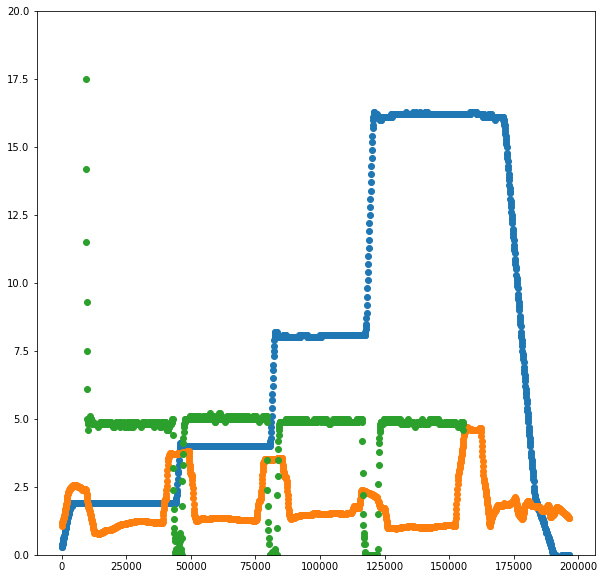

In [2]:
# 2, 4, 8, 16 m altitude with 30-s dwells with yaw signaling
filename ="Field_Experiments/Drone_Experiments/2022-06-08_07-41-55_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

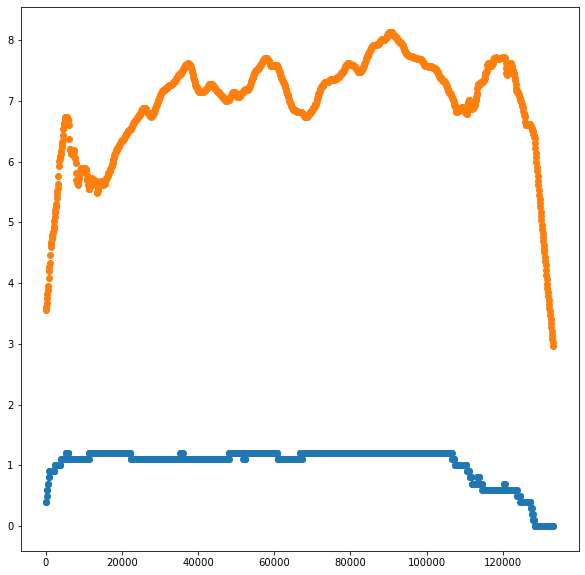

In [4]:
# First flight at Seal Beach
filename ="Field_Experiments/Drone_Experiments/2022-06-08_17-00-17_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
# plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
# plt.ylim([0, 20])

(0.0, 20.0)

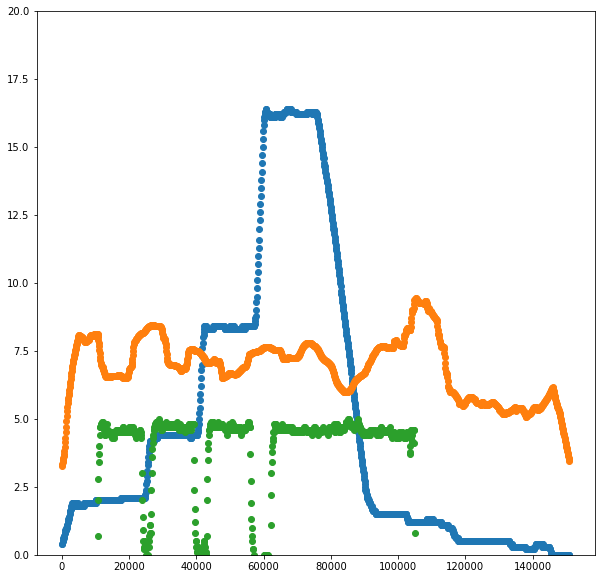

In [5]:
# First wind profile at Seal Beach
filename ="Field_Experiments/Drone_Experiments/2022-06-08_17-40-07_v2 - profile.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond'], data['altitudem'])
plt.scatter(data['timemillisecond'], filtered_tilt)
plt.scatter(data['timemillisecond'], data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

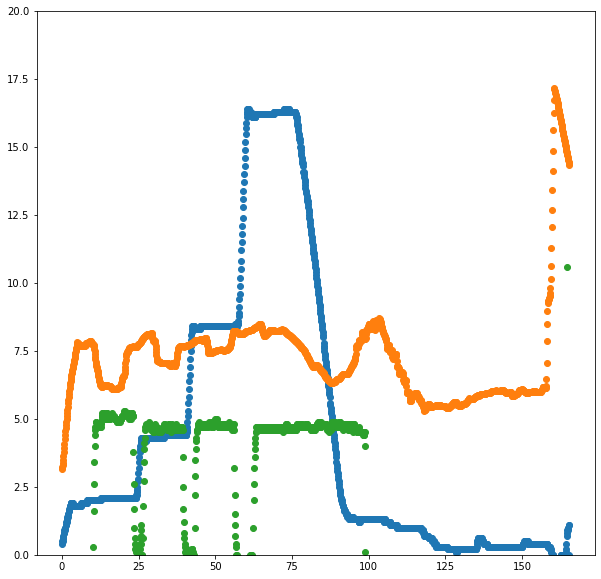

In [6]:

filename = "Field_Experiments/Drone_Experiments/2022-06-08_17-49-18_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond']/1000, data['altitudem'])
plt.scatter(data['timemillisecond']/1000, filtered_tilt)
plt.scatter(data['timemillisecond']/1000, data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

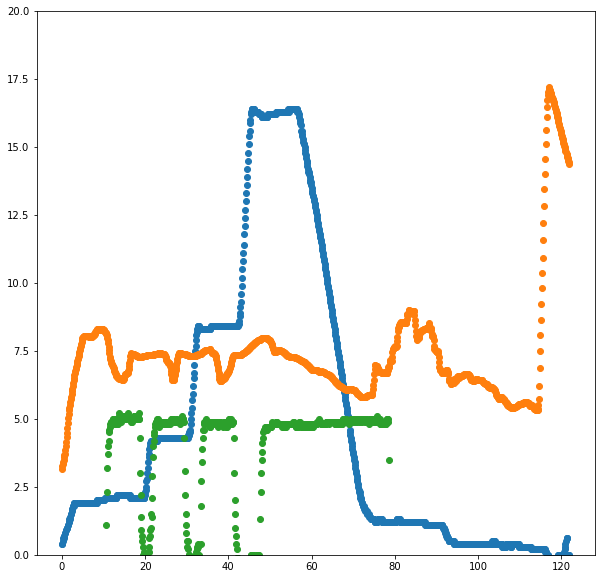

In [4]:
filename ="Field_Experiments/Drone_Experiments/2022-06-08_17-57-57_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond']/1000, data['altitudem'])
plt.scatter(data['timemillisecond']/1000, filtered_tilt)
plt.scatter(data['timemillisecond']/1000, data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])

(0.0, 20.0)

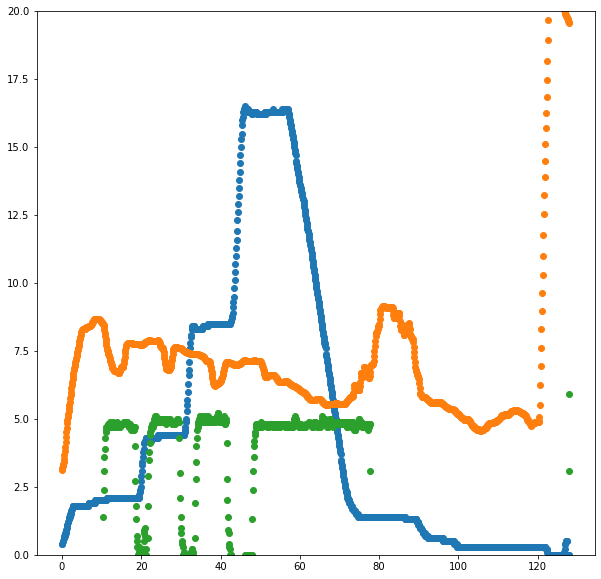

In [5]:
filename ="Field_Experiments/Drone_Experiments/2022-06-08_18-01-37_v2.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)

fig = plt.figure(figsize=(10, 10))
tilt = calc_tilt(data['pitchdeg'], data['rolldeg'])

N = 100 # measurements every 0.1 of a second
filtered_tilt = np.convolve(tilt, np.ones(N)/N, mode='same')
plt.scatter(data['timemillisecond']/1000, data['altitudem'])
plt.scatter(data['timemillisecond']/1000, filtered_tilt)
plt.scatter(data['timemillisecond']/1000, data['yawdeg'])

# plt.xlim([20000, 50000])
plt.ylim([0, 20])